# Graviational Orbit in Cartesian
This notebook explores the 2-body gravity problem in 2-dimensions. 

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

In [179]:
class Gravity_2body():
    """
    DoublePendulum class implements the parameters and differential equations for 
    a double pendulum. 
     
    Parameters
    ----------
    G : float
        gravitational constant
    m1 : float
        mass of body 1
    m2 : float
        mass of body 2

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self,
                 G=1.,
                 m1=1.,
                 m2=1.
                ):
        self.G = G 
        self.m1 = m1
        self.m2 = m2
     
    
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 4-component vector with z[0] = x1(t), z[1] = y1(t), z[2] = x2(t), z[3] = y2(t) \
            z[4] = x1_dot, z[5] = y1_dot, z[6] = x2_dot, z[7] = y2_dot
        t : float
            time 
            
        Returns
        -------
        
        """
        separation = ((z[0]-z[2])**2 + (z[1]-z[3])**2)**(1/2.)
        x1_ddot = -self.G*self.m2*(z[0]-z[2]) / separation**3
        y1_ddot = -self.G*self.m2*(z[1]-z[3]) / separation**3
        x2_ddot = self.G*self.m1*(z[0]-z[2]) / separation**3
        y2_ddot = self.G*self.m1*(z[1]-z[3]) / separation**3
        
        return [z[4], z[5], z[6], z[7], x1_ddot, y1_ddot, x2_ddot, y2_ddot]
    
    
    def solve_ode(self, t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0,
                abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        z = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0] 
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                            z, t_eval=t_pts, method='RK23',
                            atol=abserr, rtol=relerr)
        x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot  = solution.y

        return [x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot]
    
    
    def solve_ode_Leapfrog(self, t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for r, rdot, r_dot_half, phi with zeros
        num_t_pts = len(t_pts)
        x1 = np.zeros(num_t_pts)
        x1_dot = np.zeros(num_t_pts)
        x1_dot_half = np.zeros(num_t_pts)
        y1 = np.zeros(num_t_pts)
        y1_dot = np.zeros(num_t_pts)
        y1_dot_half = np.zeros(num_t_pts)
        x2 = np.zeros(num_t_pts)
        x2_dot = np.zeros(num_t_pts)
        x2_dot_half = np.zeros(num_t_pts)
        y2 = np.zeros(num_t_pts)
        y2_dot = np.zeros(num_t_pts)
        y2_dot_half = np.zeros(num_t_pts)
        
        # initial conditions
        x1[0] = x1_0
        y1[0] = y1_0
        x2[0] = x2_0
        y2[0] = y2_0
        x1_dot[0] = x1_dot_0
        y1_dot[0] = y1_dot_0
        x2_dot[0] = x2_dot_0
        y2_dot[0] = y2_dot_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            z = [x1[i], y1[i], x2[i], y2[i], x1_dot[i], y1_dot[i], x2_dot[i], y2_dot[i]]
    
            x1_dot_half[i] = x1_dot[i] + self.dz_dt(t, z)[4] * delta_t/2.
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            
            y1_dot_half[i] = y1_dot[i] + self.dz_dt(t, z)[5] * delta_t/2.
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t
            
            x2_dot_half[i] = x2_dot[i] + self.dz_dt(t, z)[6] * delta_t/2.
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t
            
            y2_dot_half[i] = y2_dot[i] + self.dz_dt(t, z)[7] * delta_t/2.
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t
            
            z = [x1[i+1], y1[i+1], x2[i+1], y2[i+1], x1_dot[i+1], y1_dot[i+1], x2_dot[i+1], y2_dot[i+1]]
            x1_dot[i+1] = x1_dot_half[i] + self.dz_dt(t, z)[4] * delta_t/2.
            y1_dot[i+1] = y1_dot_half[i] + self.dz_dt(t, z)[5] * delta_t/2.
            x2_dot[i+1] = x2_dot_half[i] + self.dz_dt(t, z)[6] * delta_t/2.
            y2_dot[i+1] = y2_dot_half[i] + self.dz_dt(t, z)[7] * delta_t/2.
            
        return x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot  
        
    
    def energy(self, t_pts, x1, x2, y1, y2, x1_dot, y1_dot, x2_dot, y2_dot):
        """Evaluate the energy as a function of time"""
        return 0.5*self.m1*(x1_dot**2+y1_dot**2) + 0.5*self.m2*(x2_dot**2+y2_dot**2) - \
                self.G*self.m1*self.m2*((x1-x2)**2+(y1-y2)**2)**(-0.5)
    

In [180]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, semilogy_e=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (semilogy_e):
        line, = ax.semilogy(x, y, base=np.e, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [181]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [182]:
# Labels for individual plot axes
y_vs_x_labels = (r'$x$', r'$y$')
theta2_vs_time_labels = (r'$t$', r'$\theta_2(t)$')
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')
theta1_dot_labels = (r'$t$', r'$\dot\theta_1(t)$')
theta2_dot_labels = (r'$t$', r'$\dot\theta_2(t)$')
state_space_1_labels = (r'$\theta_1$', r'$\dot\theta_1$')
state_space_2_labels = (r'$\theta_2$', r'$\dot\theta_2$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

G = 1/1000.
m1 = 3.
m2 = 1000.

# Instantiate a pendulum 
G1 = Gravity_2body(G=G, m1=m1, m2=m2)

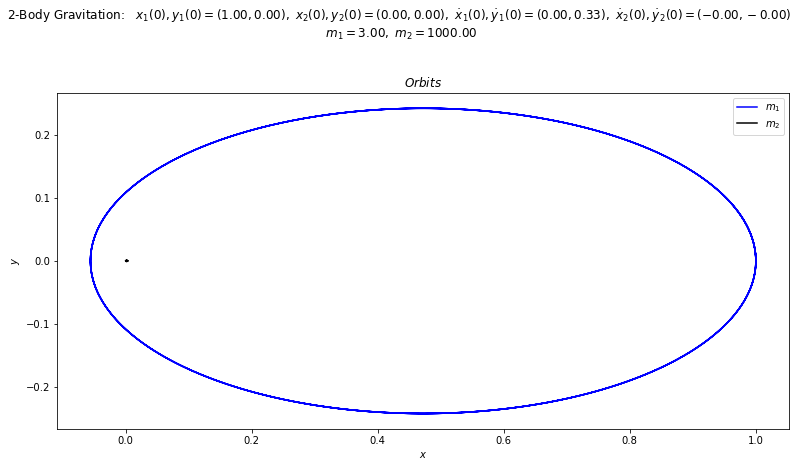

In [189]:
# both plots: same initial conditions
x1_0 = 1.
y1_0 = 0.
x2_0 = 0.
y2_0 = 0.
x1_dot_0 = 0.
y1_dot_0 = 1./m1
x2_dot_0 = -m1/m2*x1_dot_0
y2_dot_0 = -m1/m2*y1_dot_0
x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot = G1.solve_ode(t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)

# start the plot!
fig = plt.figure(figsize=(12,6))
overall_title = '2-Body Gravitation:  ' + \
                rf' $x_1(0),y_1(0) = ({x1_0:.2f},{y1_0:.2f}), $' + \
                rf' $x_2(0),y_2(0) = ({x2_0:.2f},{y2_0:.2f}), $' + \
                rf' $\dotx_1(0),\doty_1(0) = ({x1_dot_0:.2f},{y1_dot_0:.2f}), $' + \
                rf' $\dotx_2(0),\doty_2(0) = ({x2_dot_0:.2f},{y2_dot_0:.2f})$' + '\n' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f}$'

# \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=y_vs_x_labels, 
            color='blue',
            label=rf'$m_1$', 
            title=rf'$Orbits$', 
            ax=ax_a)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            color='black',
            label=rf'$m_2$',
            ax=ax_a)
ax_a.set_aspect('equal')

fig.tight_layout()
fig.savefig('2-body_orbits_final_hw.png', bbox_inches='tight')  



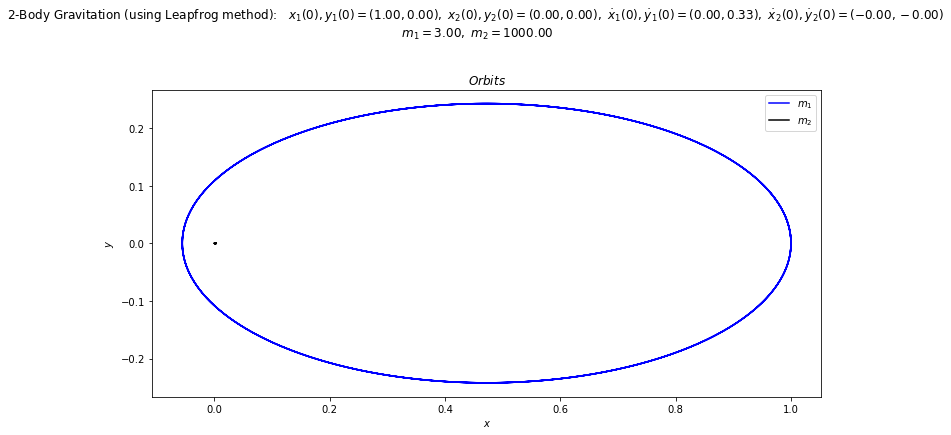

In [184]:
x1_LF, y1_LF, x2_LF, y2_LF, x1_dot_LF, y1_dot_LF, x2_dot_LF, y2_dot_LF = G1.solve_ode_Leapfrog(t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)

fig_LF = plt.figure(figsize=(12,6))
overall_title = '2-Body Gravitation (using Leapfrog method):  ' + \
                rf' $x_1(0),y_1(0) = ({x1_0:.2f},{y1_0:.2f}), $' + \
                rf' $x_2(0),y_2(0) = ({x2_0:.2f},{y2_0:.2f}), $' + \
                rf' $\dotx_1(0),\doty_1(0) = ({x1_dot_0:.2f},{y1_dot_0:.2f}), $' + \
                rf' $\dotx_2(0),\doty_2(0) = ({x2_dot_0:.2f},{y2_dot_0:.2f})$' + '\n' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f}$'

# \n means a new line (adds some space here)
fig_LF.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_LF = fig_LF.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=y_vs_x_labels, 
            color='blue',
            label=rf'$m_1$', 
            title=rf'$Orbits$', 
            ax=ax_LF)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            color='black',
            label=rf'$m_2$',
            ax=ax_LF)
ax_LF.set_aspect('equal')                                                                                            
                                                                                              
                                                                                              
                                                                                              

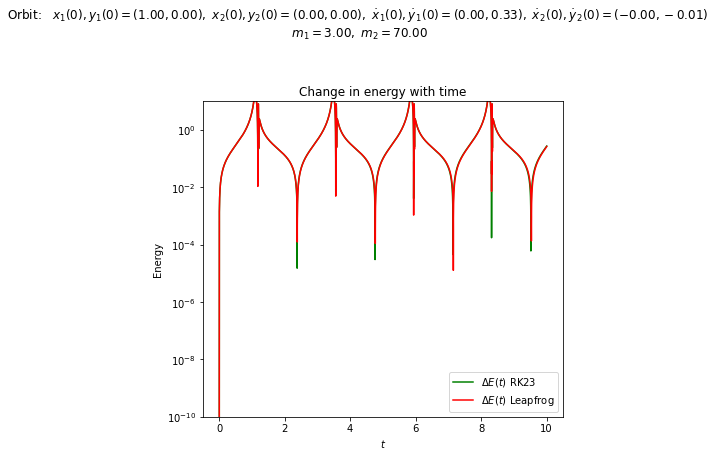

In [168]:
x1_pts, y1_pts, x2_pts, y2_pts, x1_dot_pts, y1_dot_pts, x2_dot_pts, y2_dot_pts \
                            = G1.solve_ode(t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)
x1_pts_LF, y1_pts_LF, x2_pts_LF, y2_pts_LF, x1_dot_pts_LF, y1_dot_pts_LF, x2_dot_pts_LF, y2_dot_pts_LF \
                            = G1.solve_ode_Leapfrog(t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)

E_tot_pts = G1.energy(t_pts, x1_pts, y1_pts, x2_pts, y2_pts, x1_dot_pts, y1_dot_pts, x2_dot_pts, y2_dot_pts)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

E_tot_pts_LF = G1.energy(t_pts, x1_pts_LF, y1_pts_LF, x2_pts_LF, y2_pts_LF, x1_dot_pts_LF, y1_dot_pts_LF, x2_dot_pts_LF, y2_dot_pts_LF)
E_tot_0_LF = E_tot_pts_LF[0]
E_tot_rel_pts_LF = np.abs((E_tot_pts_LF - E_tot_0_LF)/E_tot_0_LF)


fig_3 = plt.figure(figsize=(6,6))

overall_title = 'Orbit:  ' + \
                rf' $x_1(0),y_1(0) = ({x1_0:.2f},{y1_0:.2f}), $' + \
                rf' $x_2(0),y_2(0) = ({x2_0:.2f},{y2_0:.2f}), $' + \
                rf' $\dotx_1(0),\doty_1(0) = ({x1_dot_0:.2f},{y1_dot_0:.2f}), $' + \
                rf' $\dotx_2(0),\doty_2(0) = ({x2_dot_0:.2f},{y2_dot_0:.2f})$' + '\n' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f}$'
    
fig_3.suptitle(overall_title, va='baseline')

ax_3a = fig_3.add_subplot(1,1,1)
#ax_5a.semilogy(t_pts, np.abs(E_tot_pts), color='black', label=r'$E(t)$')
ax_3a.semilogy(t_pts, E_tot_rel_pts, 
               color='green', label=r'$\Delta E(t)$ RK23')
ax_3a.semilogy(t_pts, E_tot_rel_pts_LF, 
               color='red', label=r'$\Delta E(t)$ Leapfrog')
ax_3a.set_ylim(1.e-10, 1.e1)    # (1.e-12, 5)
ax_3a.set_xlabel(r'$t$')
ax_3a.set_ylabel(r'Energy')
ax_3a.set_title('Change in energy with time')
ax_3a.legend()

fig_3.tight_layout()
fig_3.savefig('Leapfrog_energy_test_1.png', dpi=200, bbox_inches='tight')